<a href="https://colab.research.google.com/github/gigiosbarbr/potifolio-giovane/blob/main/Assanigment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('CC_GENERAL.csv')

In [31]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [32]:
df = df.drop('CUST_ID', axis = 1)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [34]:
for col in df.columns:
  min = df[col].min()
  df.fillna(min, inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [40]:
col_escolhidas = ['BALANCE','PURCHASES','MINIMUM_PAYMENTS',
'PAYMENTS',
'CREDIT_LIMIT','PURCHASES_TRX','ONEOFF_PURCHASES',
'CASH_ADVANCE','CASH_ADVANCE_TRX']

quantiles_095 = []
for col in col_escolhidas:
  filtro = df[col].quantile(0.95)
  quantiles_095.append(filtro)
  

In [43]:
quantiles_095

[5909.111807849996,
 3998.619499999998,
 2719.5669347999956,
 6082.090595249998,
 12000.0,
 57.0,
 2671.0939999999937,
 4647.169121999989,
 15.0]

In [44]:
for i, col in enumerate(col_escolhidas):
  print(i)
  df = df[df[col] < quantiles_095[i]]


0
1
2
3
4
5
6
7
8


In [45]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.00,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.00,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,0.000000,0.00,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6


In [47]:
df['CREDIT_LIMIT'].describe()

count     6880.000000
mean      3456.195289
std       2465.730189
min          0.000000
25%       1500.000000
50%       2700.000000
75%       5000.000000
max      11500.000000
Name: CREDIT_LIMIT, dtype: float64

In [50]:
std = StandardScaler()
df_stand = pd.DataFrame(std.fit_transform(df), columns = df.columns)

In [51]:
df_stand

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.801300,-0.156791,-0.671245,-0.580259,-0.406649,-0.554374,-0.772000,-0.624223,-0.680848,-0.654668,-0.608844,-0.686175,-0.996205,-0.792934,-0.611860,-0.528461,0.378142
1,1.259571,0.563133,0.268683,0.913521,-0.617526,-0.554374,1.354168,3.205472,-0.896459,-0.654668,-0.608844,0.199112,1.640122,-0.361755,0.487862,-0.528461,0.378142
2,0.563885,-0.876715,1.275261,2.315838,-0.617526,-0.326219,-0.984619,-0.305083,-0.896459,-0.109281,-0.274965,-0.774704,1.640122,-0.999977,-0.926395,-0.528461,0.378142
3,-0.148997,0.563133,-0.781357,-0.549346,-0.617526,-0.554374,-0.984619,-0.305083,-0.896459,-0.654668,-0.608844,-0.774704,-0.915088,-0.304025,-0.374496,-0.528461,0.378142
4,0.684097,0.563133,1.045441,-0.580259,2.329625,-0.554374,0.503701,-0.624223,0.612826,-0.654668,-0.608844,-0.155003,-0.671734,0.436442,4.500906,-0.528461,0.378142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6875,-0.811718,0.563133,-0.399822,-0.580259,0.025981,-0.554374,1.354168,-0.624223,1.259663,-0.654668,-0.608844,-0.332060,-0.996205,-0.665927,-0.816177,1.192779,-3.892637
6876,-0.819536,0.563133,-0.387507,-0.580259,0.045610,-0.554374,1.354168,-0.624223,1.259663,-0.654668,-0.608844,-0.332060,-0.996205,-0.716951,-0.926395,-0.528461,-3.892637
6877,-0.815996,-0.096800,-0.603292,-0.580259,-0.298337,-0.554374,0.928933,-0.624223,0.828440,-0.654668,-0.608844,-0.420589,-0.996205,-0.916596,-0.740577,0.332159,-3.892637
6878,-0.824344,-0.096800,-0.803546,-0.580259,-0.617526,-0.513841,-1.197235,-0.624223,-0.896459,0.436113,0.058914,-0.863232,-1.199000,-0.946062,-0.800690,0.332159,-3.892637


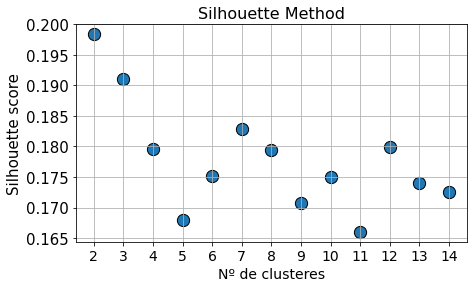

In [66]:
alvo = df_stand
max = 15
km_silhouette = []
km_scores = []
for i in range(2,max):
  km = KMeans(n_clusters=i, random_state=0).fit(alvo)
  preds = km.predict(alvo)
  km_scores.append(-km.score(alvo))
  silhouette = silhouette_score(alvo,preds)
  km_silhouette.append(silhouette) 
# Plotagem do método da Silhouette (Silhueta) 
plt.figure(figsize=(7,4))
plt.title("Silhouette Method",fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Nº de clusteres",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [90]:
pca = PCA(n_components=2)
df_trans = pca.fit_transform(df_stand)
gm = GaussianMixture(n_components = 5)
cluster = gm.fit_predict(df_trans)
df_trans_cluster = pd.DataFrame(df_trans, columns = ['P1', 'P2'])
df_trans_cluster['Cluster'] = cluster

df_trans_cluster


df_stand['Cluster'] = cluster

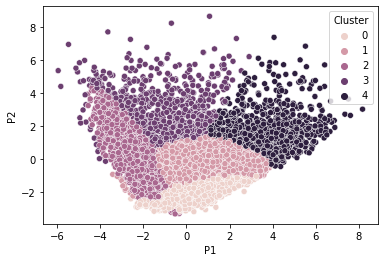

In [89]:
sns.scatterplot(data= df_trans_cluster, x = 'P1', y = 'P2', hue = 'Cluster')

In [92]:
df_stand['Cluster'] = df_stand['Cluster'].astype('str')

In [93]:
df_stand.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,-0.801300,-0.156791,-0.671245,-0.580259,-0.406649,-0.554374,-0.772000,-0.624223,-0.680848,-0.654668,-0.608844,-0.686175,-0.996205,-0.792934,-0.611860,-0.528461,0.378142,2
1,1.259571,0.563133,0.268683,0.913521,-0.617526,-0.554374,1.354168,3.205472,-0.896459,-0.654668,-0.608844,0.199112,1.640122,-0.361755,0.487862,-0.528461,0.378142,4
2,0.563885,-0.876715,1.275261,2.315838,-0.617526,-0.326219,-0.984619,-0.305083,-0.896459,-0.109281,-0.274965,-0.774704,1.640122,-0.999977,-0.926395,-0.528461,0.378142,0
3,-0.148997,0.563133,-0.781357,-0.549346,-0.617526,-0.554374,-0.984619,-0.305083,-0.896459,-0.654668,-0.608844,-0.774704,-0.915088,-0.304025,-0.374496,-0.528461,0.378142,2
4,0.684097,0.563133,1.045441,-0.580259,2.329625,-0.554374,0.503701,-0.624223,0.612826,-0.654668,-0.608844,-0.155003,-0.671734,0.436442,4.500906,-0.528461,0.378142,4


In [94]:
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           6880 non-null   float64
 1   BALANCE_FREQUENCY                 6880 non-null   float64
 2   PURCHASES                         6880 non-null   float64
 3   ONEOFF_PURCHASES                  6880 non-null   float64
 4   INSTALLMENTS_PURCHASES            6880 non-null   float64
 5   CASH_ADVANCE                      6880 non-null   float64
 6   PURCHASES_FREQUENCY               6880 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        6880 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  6880 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            6880 non-null   float64
 10  CASH_ADVANCE_TRX                  6880 non-null   float64
 11  PURCHASES_TRX                     6880 non-null   float64
 12  CREDIT

In [95]:
df_Final = pd.get_dummies(df_stand)

In [96]:
df_Final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4
0,-0.801300,-0.156791,-0.671245,-0.580259,-0.406649,-0.554374,-0.772000,-0.624223,-0.680848,-0.654668,...,-0.996205,-0.792934,-0.611860,-0.528461,0.378142,0,0,1,0,0
1,1.259571,0.563133,0.268683,0.913521,-0.617526,-0.554374,1.354168,3.205472,-0.896459,-0.654668,...,1.640122,-0.361755,0.487862,-0.528461,0.378142,0,0,0,0,1
2,0.563885,-0.876715,1.275261,2.315838,-0.617526,-0.326219,-0.984619,-0.305083,-0.896459,-0.109281,...,1.640122,-0.999977,-0.926395,-0.528461,0.378142,1,0,0,0,0
3,-0.148997,0.563133,-0.781357,-0.549346,-0.617526,-0.554374,-0.984619,-0.305083,-0.896459,-0.654668,...,-0.915088,-0.304025,-0.374496,-0.528461,0.378142,0,0,1,0,0
4,0.684097,0.563133,1.045441,-0.580259,2.329625,-0.554374,0.503701,-0.624223,0.612826,-0.654668,...,-0.671734,0.436442,4.500906,-0.528461,0.378142,0,0,0,0,1


In [123]:
y = df['CREDIT_LIMIT']

X_train, X_test, y_train, y_test = train_test_split(df_Final, y, test_size=0.2, random_state = 42)

y_train = pd.DataFrame(y_train).astype(int)
X_train = pd.DataFrame(X_train)

y_test = pd.DataFrame(y_test).astype(int)
X_test = pd.DataFrame(X_test)

X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4
969,-0.615549,0.563133,2.837958,4.492915,-0.617526,-0.554374,1.354168,3.205472,-0.896459,-0.654668,...,0.423356,1.554639,-0.548863,2.914020,0.378142,0,0,0,0,1
6424,1.157260,0.563133,-0.803546,-0.580259,-0.617526,0.300341,-1.197235,-0.624223,-0.896459,2.072281,...,-0.387822,-0.425293,0.841702,-0.528461,0.378142,0,0,1,0,0
5771,-0.146228,0.563133,-0.248841,0.192530,-0.617526,-0.554374,-0.984619,-0.305083,-0.896459,-0.654668,...,-0.387822,0.169776,-0.465561,-0.528461,0.378142,1,0,0,0,0
1407,0.145029,0.563133,-0.672216,-0.397296,-0.617526,-0.346143,-0.772000,0.014061,-0.896459,2.072281,...,-0.915088,-0.640015,-0.284733,-0.528461,0.378142,0,0,1,0,0
3887,0.058072,0.563133,0.676609,-0.111976,1.205964,3.446203,0.928933,0.333201,0.828440,-0.109281,...,1.031739,3.894930,-0.274058,-0.241589,0.378142,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,-0.255715,0.563133,0.120892,-0.580259,0.855961,-0.554374,1.354168,-0.624223,1.690889,-0.654668,...,1.031739,0.159757,-0.542793,-0.528461,0.378142,1,0,0,0,0
5191,0.322903,0.563133,1.460925,2.334965,-0.343474,-0.554374,0.716317,1.609764,-0.465234,-0.654668,...,1.234533,-0.016907,0.000127,-0.528461,0.378142,0,0,0,0,1
5226,-0.674995,0.563133,0.390416,1.083113,-0.617526,-0.554374,0.291082,1.609764,-0.896459,-0.654668,...,-1.077323,0.027341,-0.487573,-0.241589,0.378142,1,0,0,0,0
5390,-0.821397,-2.676529,3.034896,0.377231,4.405195,-0.554374,1.354168,3.205472,1.690889,-0.654668,...,-0.185028,0.356957,-0.894802,-0.528461,0.378142,0,0,0,0,1


In [125]:
MLP = MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)
rede_neu = MLP.fit(X_train, y_train)
y_pred = rede_neu.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [127]:
print('O valor de R_2 Score visto foi de: ', r2_score(y_test, y_pred))

O valor de R_2 Score visto foi de:  0.9997431461557185


In [134]:
Comparacao = y_test.copy()
Comparacao['Credito Previsto'] = y_pred

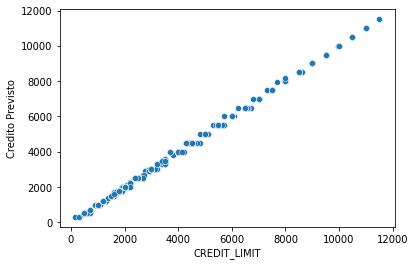

In [136]:
sns.scatterplot(data = Comparacao, x = 'CREDIT_LIMIT', y = 'Credito Previsto')